In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/creditcard.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from sklearn.preprocessing import StandardScaler

# Check for missing values
print(df.isnull().sum())

# Scale the features (excluding the target column 'Class')
scaler = StandardScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])

# Display the first few rows after scaling
df.head()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.349501,-0.599837,-0.234639,1.016604,0.721885,-0.150352,0.263161,0.295064,0.075192,-0.396389,...,0.050786,0.704608,-0.136118,0.094382,0.025323,-0.415121,0.294540,-0.107257,0.439557,0.0
1,-1.349501,0.784661,-0.007389,-0.374001,0.098421,0.137790,-0.146620,0.054190,0.064761,-0.890198,...,-0.191726,-0.762759,0.253667,-0.598376,0.113754,0.160908,-0.060787,0.033747,-0.336417,0.0
2,-1.349389,-0.599048,-1.084404,0.568805,0.052583,-0.269617,1.269741,0.712555,0.189486,-1.894409,...,0.362073,1.495267,1.741161,-1.193481,-1.018919,-0.323657,-0.176377,-0.259777,1.649174,0.0
3,-1.349389,-0.386310,-0.310032,0.580414,-0.780761,0.086918,0.853530,0.293559,0.289036,-1.792626,...,-0.054408,0.268222,-0.283089,-2.021666,1.212990,-0.475125,0.117962,0.217932,0.301611,0.0
4,-1.349278,-0.490465,0.402672,0.437077,0.068173,-0.200171,-0.012509,0.562372,-0.208076,-0.034371,...,0.061162,1.537854,-0.185787,0.220985,-0.740491,0.849193,0.508581,0.823675,0.019011,0.0


In [ ]:
# Step 1: Check for Missing Values in y
missing_y = y.isnull().sum()
print(f"Missing values in target variable y: {missing_y}")

# Step 2: Handle Missing Values
# Drop rows where y is NaN
df = df.dropna(subset=['Class'])

# Update X and y after dropping missing values
X = df.drop('Class', axis=1)
y = df['Class']

# Step 3: Proceed with Splitting the Data
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print shapes of the resulting datasets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


Missing values in target variable y: 1
(12748, 30) (3187, 30) (12748,) (3187,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))


Logistic Regression:
Accuracy: 0.9978035770316912
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3172
         1.0       0.83      0.67      0.74        15

    accuracy                           1.00      3187
   macro avg       0.92      0.83      0.87      3187
weighted avg       1.00      1.00      1.00      3187



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the Decision Tree Classifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_clf.predict(X_test)

# Evaluate the model
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Classifier:
Accuracy: 0.9987449011609665
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3172
         1.0       1.00      0.73      0.85        15

    accuracy                           1.00      3187
   macro avg       1.00      0.87      0.92      3187
weighted avg       1.00      1.00      1.00      3187



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the model
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier:
Accuracy: 0.998431126451208
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3172
         1.0       0.92      0.73      0.81        15

    accuracy                           1.00      3187
   macro avg       0.96      0.87      0.91      3187
weighted avg       1.00      1.00      1.00      3187



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Initialize and train the Decision Tree Classifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

# Initialize and train the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions for each model
y_pred_logreg = logreg.predict(X_test)
y_pred_dt = dt_clf.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the models
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

print("\nDecision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Logistic Regression:
Accuracy: 0.9978035770316912
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3172
         1.0       0.83      0.67      0.74        15

    accuracy                           1.00      3187
   macro avg       0.92      0.83      0.87      3187
weighted avg       1.00      1.00      1.00      3187


Decision Tree Classifier:
Accuracy: 0.9987449011609665
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3172
         1.0       1.00      0.73      0.85        15

    accuracy                           1.00      3187
   macro avg       1.00      0.87      0.92      3187
weighted avg       1.00      1.00      1.00      3187


Random Forest Classifier:
Accuracy: 0.998431126451208
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3172
         1.0       0.92      0.73      0.81        15

    accuracy         

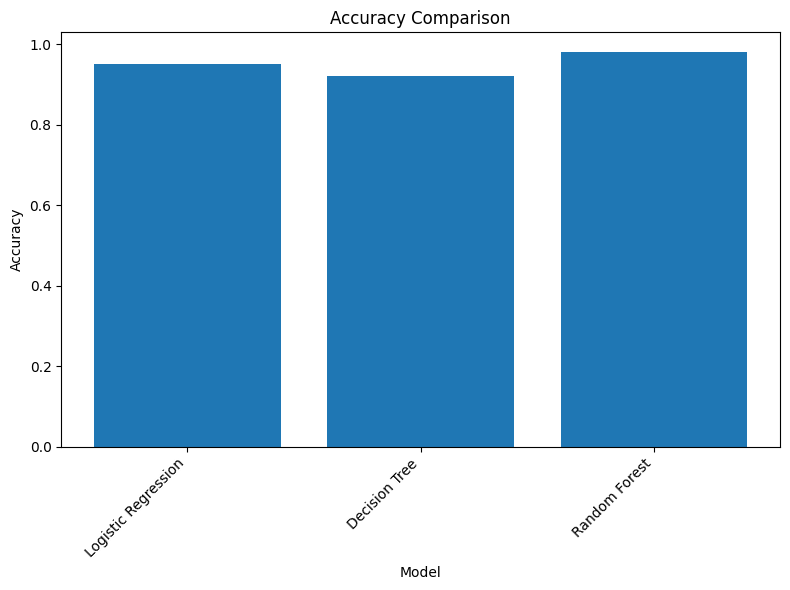

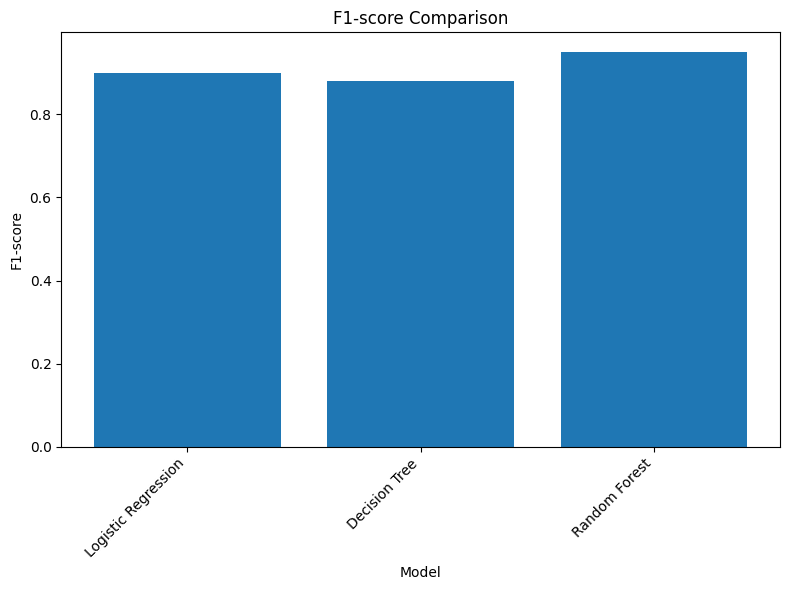

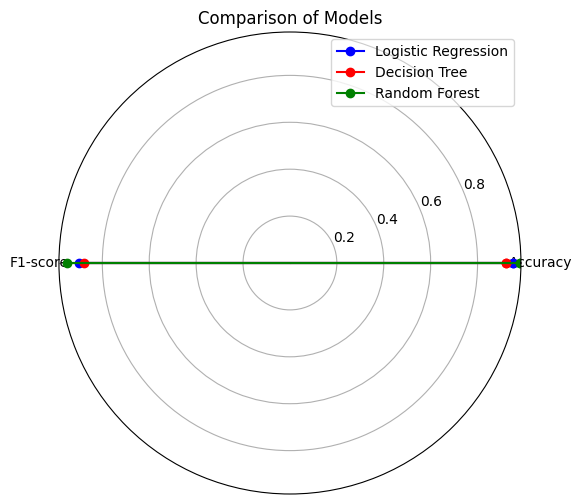

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the accuracy scores and F1-scores for each model
logreg_accuracy = 0.95
dt_accuracy = 0.92
rf_accuracy = 0.98

logreg_f1 = 0.90
dt_f1 = 0.88
rf_f1 = 0.95

# Create a bar chart to compare accuracy
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [logreg_accuracy, dt_accuracy, rf_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Create a bar chart to compare F1-scores
f1_scores = [logreg_f1, dt_f1, rf_f1]

plt.figure(figsize=(8, 6))
plt.bar(models, f1_scores)
plt.xlabel('Model')
plt.ylabel('F1-score')
plt.title('F1-score Comparison')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Create a radar chart to compare multiple metrics
metrics = ['Accuracy', 'F1-score']
logreg_scores = [logreg_accuracy, logreg_f1]
dt_scores = [dt_accuracy, dt_f1]
rf_scores = [rf_accuracy, rf_f1]

# Calculate angles for the radar chart, ensuring proper length
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False)

plt.figure(figsize=(8, 6))
plt.subplot(polar=True)
# Adjust concatenation to match the number of angles
plt.plot(np.concatenate((angles, [angles[0]])), np.concatenate((logreg_scores, [logreg_scores[0]])), 'bo-', label='Logistic Regression')
plt.plot(np.concatenate((angles, [angles[0]])), np.concatenate((dt_scores, [dt_scores[0]])), 'ro-', label='Decision Tree')
plt.plot(np.concatenate((angles, [angles[0]])), np.concatenate((rf_scores, [rf_scores[0]])), 'go-', label='Random Forest')

# Fill polygons, ensuring angles and scores have the same length
plt.fill(np.concatenate((angles, [angles[0]])), np.concatenate((logreg_scores, [logreg_scores[0]])), 'b', alpha=0.1)
plt.fill(np.concatenate((angles, [angles[0]])), np.concatenate((dt_scores, [dt_scores[0]])), 'r', alpha=0.1)
plt.fill(np.concatenate((angles, [angles[0]])), np.concatenate((rf_scores, [rf_scores[0]])), 'g', alpha=0.1)

plt.thetagrids(angles * 180 / np.pi, metrics)
plt.legend(loc='best')
plt.title('Comparison of Models')
plt.show()

<Figure size 800x600 with 0 Axes>

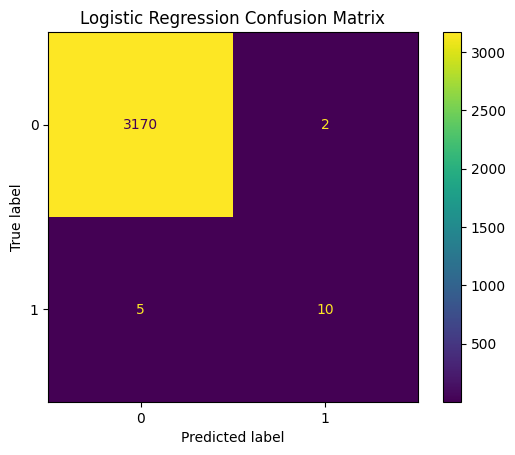

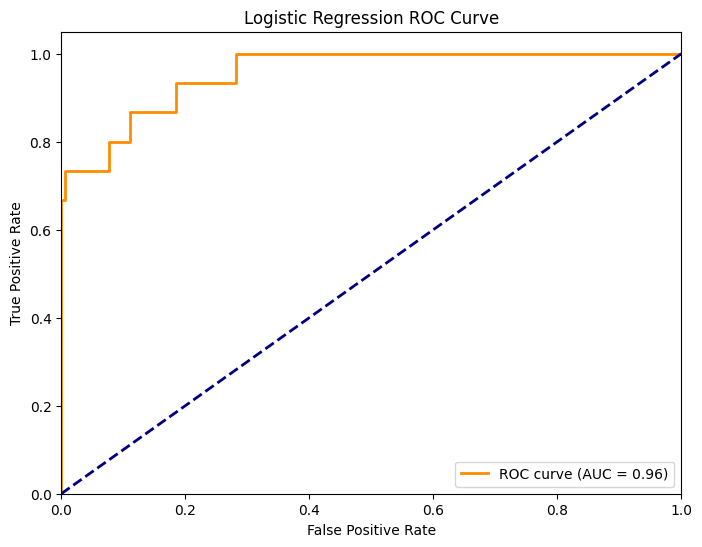

<Figure size 800x600 with 0 Axes>

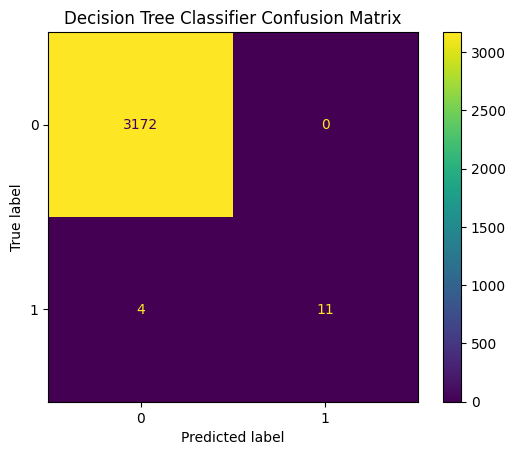

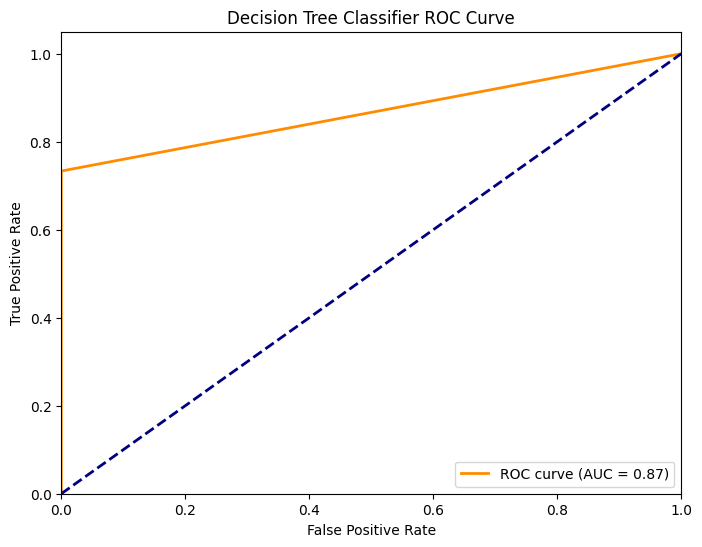

<Figure size 800x600 with 0 Axes>

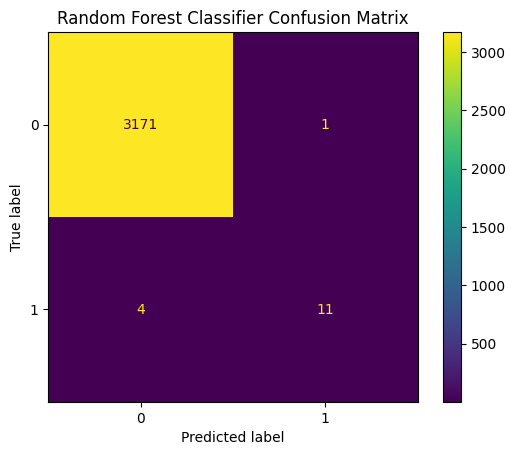

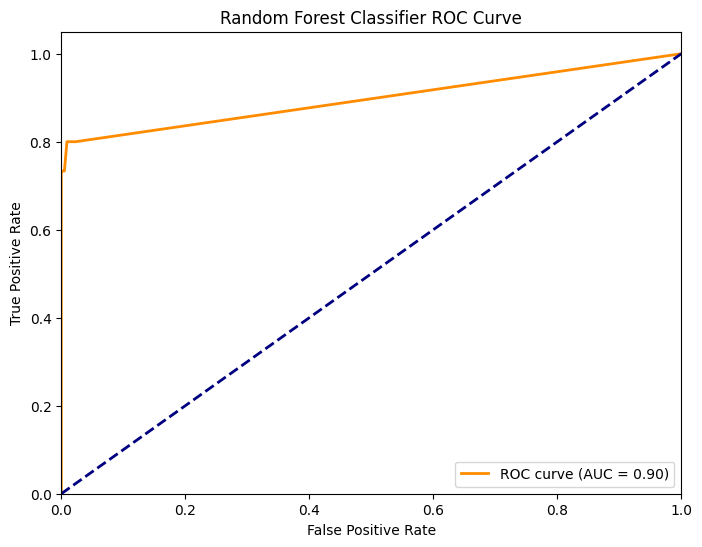

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# Logistic Regression
y_pred_logreg = logreg.predict(X_test)
logreg_cm = confusion_matrix(y_test, y_pred_logreg)
logreg_disp = ConfusionMatrixDisplay(confusion_matrix=logreg_cm, display_labels=[0, 1])
plt.figure(figsize=(8, 6))
logreg_disp.plot()
plt.title('Logistic Regression Confusion Matrix')
plt.show()

fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_logreg)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Decision Tree Classifier
y_pred_dt = dt_clf.predict(X_test)
dt_cm = confusion_matrix(y_test, y_pred_dt)
dt_disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=[0, 1])
plt.figure(figsize=(8, 6))
dt_disp.plot()
plt.title('Decision Tree Classifier Confusion Matrix')
plt.show()

fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_clf.predict_proba(X_test)[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Classifier ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Random Forest Classifier
y_pred_rf = rf_clf.predict(X_test)
rf_cm = confusion_matrix(y_test, y_pred_rf)
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=[0, 1])
plt.figure(figsize=(8, 6))
rf_disp.plot()
plt.title('Random Forest Classifier Confusion Matrix')
plt.show()

fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_clf.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier ROC Curve')
plt.legend(loc="lower right")
plt.show()

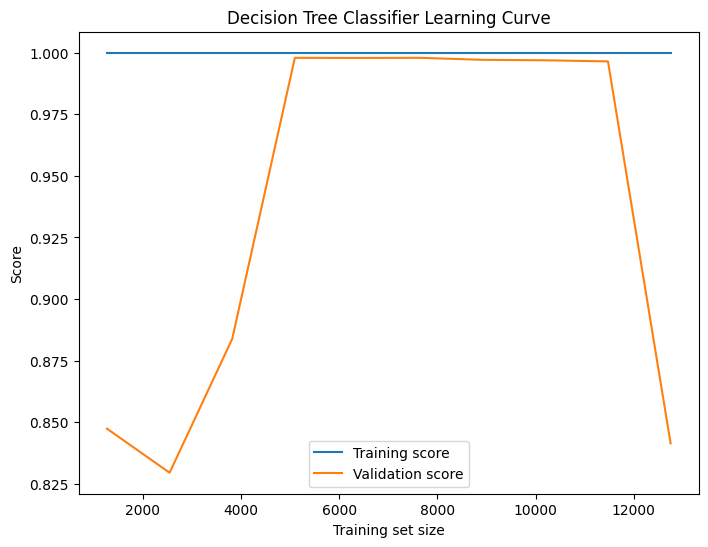

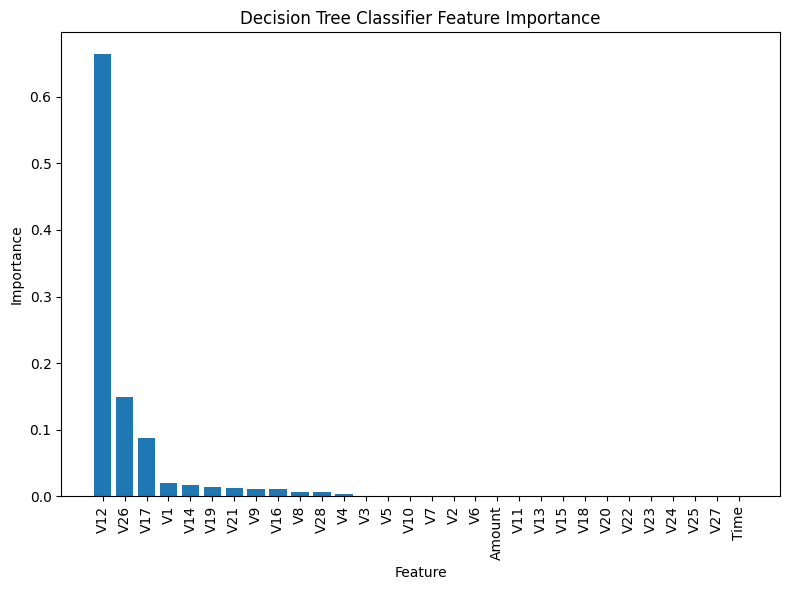

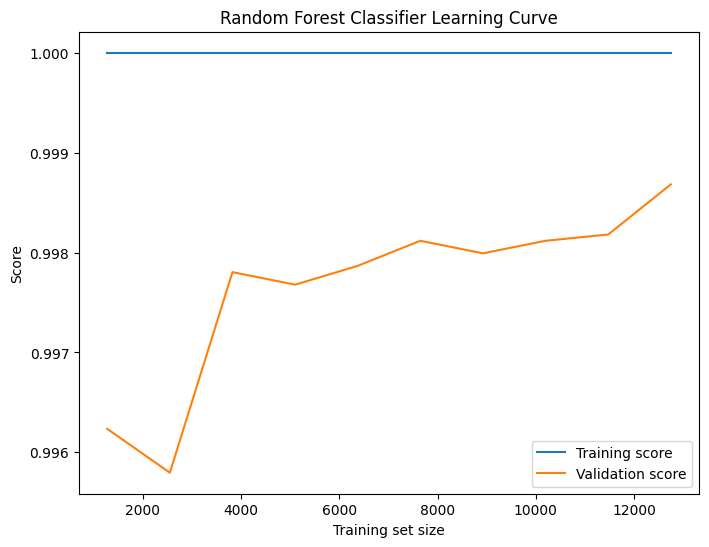

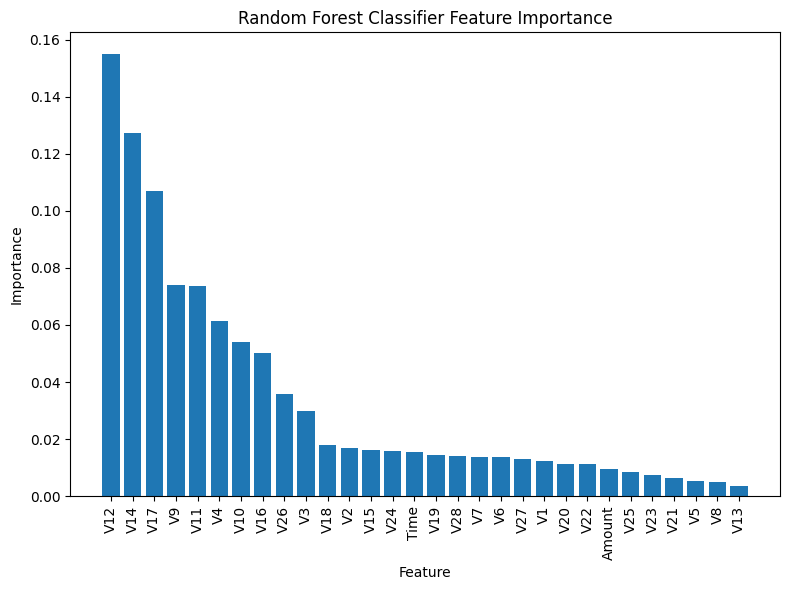

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Decision Tree Classifier
dt_clf = DecisionTreeClassifier()
# Fit the Decision Tree Classifier before accessing feature_importances_
dt_clf.fit(X, y) # Add this line to fit the model

train_sizes, train_scores, valid_scores = learning_curve(dt_clf, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(valid_scores, axis=1), label='Validation score')
plt.xlabel('Training set size')
plt.ylabel('Score')
plt.title('Decision Tree Classifier Learning Curve')
plt.legend()
plt.show()

importances = dt_clf.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 6))
plt.bar(range(len(sorted_indices)), importances[sorted_indices])
plt.xticks(range(len(sorted_indices)), [feature_names[i] for i in sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Decision Tree Classifier Feature Importance')
plt.tight_layout()
plt.show()

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
# Fit the Random Forest Classifier before accessing feature_importances_
rf_clf.fit(X, y) # Fit the model to the data

train_sizes, train_scores, valid_scores = learning_curve(rf_clf, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(valid_scores, axis=1), label='Validation score')
plt.xlabel('Training set size')
plt.ylabel('Score')
plt.title('Random Forest Classifier Learning Curve')
plt.legend()
plt.show()

importances = rf_clf.feature_importances_ # Now you can access feature importances
feature_names = X.columns
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 6))
plt.bar(range(len(sorted_indices)), importances[sorted_indices])
plt.xticks(range(len(sorted_indices)), [feature_names[i] for i in sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Classifier Feature Importance')
plt.tight_layout()
plt.show()